# How to marry a star: probabilistic constraints for meaning in context

## Katrin Erk and Aurelie Herbelot, August 2020

## WebPPL experiments for the paper

# Version 1 of the generative story: global constraints only

## Version 1 step 1: Drawing a collection of high-level frames

This experiment illustrates how the probability of drawing on one versus two scenarios within a single situation description depends on the Dirichlet concentration parameter alpha. 

We use the output of 

`webppl version1.wppl > version1out.txt`

This script has two scenarios only:
* Scenario 0: gothic. Concepts: Bat/animal, Vampire
* Scenario 1: baseball. Concepts: Bat/stick, Player


This particular output was produced with the following output:
* 2000 samples
* concentration parameter alpha = 0.5
* each SD has to have between 1 and 4 referents. 

In [1]:
# Reading in the data

import wpplout
samples = wpplout.parse_webppl_groupformat("version1out.txt")


How often did we get 1, 2, 3, or 4 referents? This is about equal, which makes sense, since we drew the number of referents from a uniform distribution:

In [2]:
wpplout.webppl_groupformat_referentspd(samples)

,num referents,prob
0,1,0.2575
1,2,0.2390
2,3,0.2565
3,4,0.2470


How often did we get only tokens of scenario 1, only tokens of scenario 2, tokens of both?

In [3]:
wpplout.webppl_groupformat_scenariopd(samples)

,scenarios,prob
0,gothic,0.3560
1,baseball,0.3765
2,"baseball, gothic",0.2675


Now both together: How often did we get samples with 1, 2, 3, 4 referents, and what scenarios did they have?

In [4]:
wpplout.webppl_groupformat_scenarios_referentspd(samples)

,num referents,scenarios,prob
0,1,gothic,0.1295
1,1,baseball,0.1280
2,2,"gothic, gothic",0.0895
3,2,"baseball, baseball",0.0930
4,2,"baseball, gothic",0.0565
5,3,"baseball, baseball, baseball",0.0880
6,3,"gothic, gothic, gothic",0.0675
7,4,"gothic, gothic, gothic, gothic",0.0695
8,3,"baseball, gothic, gothic",0.0515
9,4,"baseball, baseball, baseball, baseball",0.0675


### Now with alpha = 0.1

To re-run this, edit `version1.wppl` to set alpha to 0.1.

`webppl version1.wppl > version1out_alpha01.txt`


In [5]:
samples01 = wpplout.parse_webppl_groupformat("version1out_alpha01.txt")
wpplout.webppl_groupformat_scenariopd(samples01)

,scenarios,prob
0,gothic,0.4740
1,baseball,0.4425
2,"baseball, gothic",0.0835


## Version 1 step 2: concepts sampled from the scenarios


We use the exact same sample of 2000 situation descriptions from above. What kinds of sampled concepts are we seeing?

All concepts have been set to be to be equally likely within a scenario.

In [6]:
import pandas as pd

pd.set_option('display.max_colwidth', 1000)

wpplout.webppl_groupformat_concepts_referentspd(samples).head(20)

,num referents,concepts,prob
0,1,gothic/Bat-animal,0.0670
1,1,baseball/Bat-stick,0.0650
2,1,baseball/Player,0.0630
3,1,gothic/Vampire,0.0625
4,2,"gothic/Bat-animal, gothic/Bat-animal",0.0205
5,2,"baseball/Bat-stick, baseball/Bat-stick",0.0195
6,2,"baseball/Bat-stick, baseball/Player",0.0470
7,2,"gothic/Vampire, gothic/Vampire",0.0250
8,2,"gothic/Bat-animal, gothic/Vampire",0.0440
9,2,"baseball/Player, baseball/Player",0.0265


## Version 1 step 3: Feature vectors sampled from the concepts


We use the exact same sample of 2000 situation descriptions from above. What kinds of sampled feature vectors are we seeing? We also show the concepts.

Probabilities of truth are as follows. For "bat", we have used the truth probabilities from the Quantified McRae norms of Herbelot and Vecchi wherever possible.

* Bat-animal:
  * "bat" 1.0, "vampire" 0.01, "player" 0.01, "have_wings" 1.0 (McRae), "fly" 1.0 (McRae), "humanlike" 0.0, "athletic" 0.01, "wooden" 0.001
* Vampire:
  * "bat" 0.01, "vampire" 1.0, "player" 0.01, "have_wings" 0.2, "fly" 0.2, "humanlike" 0.99, "athletic" 0.1, "wooden" 0.001
* Bat-stick
  * "bat" 1.0, "vampire" 0.0, "player" 0.0, "have_wings" 0.01, "fly" 0.01, "humanlike" 0.0, "athletic" 0.0, "wooden" 0.75 (QMcRae)
* Player 
  * "bat" 0.0, "vampire" 0.001, "player" 1.0, "have_wings" 0.01, "fly" 0.01, "humanlike" 0.99, "athletic" 0.8, "wooden" 0.001


In [7]:
df = wpplout.webppl_groupformat_fvectors_pd(samples)
df.sort_values('prob',ascending=False).head(20)


,feature vectors,prob
0,"Bat-animal:bat,-vampire,-player,have_wings,fly,-humanlike,-athletic,-wooden",0.0650
1,"Bat-stick:bat,-vampire,-player,-have_wings,-fly,-humanlike,-athletic,wooden",0.0485
2,"Player:-bat,-vampire,player,-have_wings,-fly,humanlike,athletic,-wooden",0.0480
3,"Vampire:-bat,vampire,-player,-have_wings,-fly,humanlike,-athletic,-wooden",0.0320
10,"Bat-stick:bat,-vampire,-player,-have_wings,-fly,-humanlike,-athletic,wooden, Player:-bat,-vampire,player,-have_wings,-fly,humanlike,athletic,-wooden",0.0245
12,"Bat-animal:bat,-vampire,-player,have_wings,fly,-humanlike,-athletic,-wooden, Vampire:-bat,vampire,-player,-have_wings,-fly,humanlike,-athletic,-wooden",0.0235
8,"Bat-animal:bat,-vampire,-player,have_wings,fly,-humanlike,-athletic,-wooden, Bat-animal:bat,-vampire,-player,have_wings,fly,-humanlike,-athletic,-wooden",0.0190
37,"Bat-animal:bat,-vampire,-player,have_wings,fly,-humanlike,-athletic,-wooden, Bat-animal:bat,-vampire,-player,have_wings,fly,-humanlike,-athletic,-wooden, Vampire:-bat,vampire,-player,-have_wings,-fly,humanlike,-athletic,-wooden",0.0150
13,"Player:-bat,-vampire,player,-have_wings,-fly,humanlike,athletic,-wooden, Player:-bat,-vampire,player,-have_wings,-fly,humanlike,athletic,-wooden",0.0150
4,"Bat-stick:bat,-vampire,-player,-have_wings,-fly,-humanlike,-athletic,-wooden",0.0150


## Version 1 DRS conditions

We use the exact same sample of 2000 situation descriptions from above. What conditions are being generated? We also show the concepts.

Probabilities of truth are as follows. For bat, we have used the salience probabilities from the McRae norms wherever possible.

"vampire", "player", "have_wings", "fly", "humanlike", "athletic", "wooden"
* Bat-animal
  * bat: 1.0, vampire: 0.01, player: 0.0, have_wings: 0.867 (McRae), fly: 0.633 (McRae), humanlike: 0.0, athletic: 0.0, wooden: 0.0
* Vampire
  * bat 0.0, vampire 1.0, player 0.0, have_wings 0.1, fly 0.1, humanlike 0.1, athletic 0.0, wooden 0.0
* Bat-stick
  * bat 1.0, vampire 0.0, player 0.0, have_wings 0.0, fly 0.0, humanlike 0.0, athletic 0.0, wooden 0.733 (McRae)
* Player
  * bat 0.0, vampire 0.0, player 1.0, have_wings 0.0, fly 0.0, humanlike 0.0, athletic 0.6, wooden 0.0
 

In [8]:
wpplout.webppl_groupformat_conditions_pd(samples).sort_values("prob", 
                                                              ascending = False).head(20)

,conditions,prob
3,Vampire:vampire,0.0505
0,"Bat-animal:bat,have_wings,fly",0.0385
1,"Bat-stick:bat,wooden",0.0355
4,Player:player,0.0270
2,"Player:player,athletic",0.0265
5,"Bat-animal:bat,have_wings",0.0185
6,Bat-stick:bat,0.0185
15,"Bat-animal:bat,have_wings,fly, Vampire:vampire",0.0180
13,"Vampire:vampire, Vampire:vampire",0.0160
7,"Bat-stick:bat,-wooden",0.0110


## Version 1, with utterance

We now want to show what happens when reasoning starts from a given utterance. 

Everything up to now was an analysis of the same set of 2000 samples. But for the with-utterance case, we need to get a new set of samples.

* Referents: again between 1 and 4, including the ones in the utterance
* parameters: all the same as above

A version 1 of the generative story does not have semantic roles, our utterances are very simplistic. One is "vampire", the other is the empty utterance.

### "Vampire"

The first utterance is "vampire". What we want to show with that is that when you have an utterance that comes from scenario "Gothic", you are more likely to sample the rest of the utterance from "Gothic" rather than from "Baseball". That is, we want to show that our model tends to stick with the same scenario when it generates additional entities.

call:

`` webppl version1_utterance.wppl > vampireout.txt``


In [9]:
vampire_samples = wpplout.parse_webppl_groupformat("vampireout.txt")


What does the scenario distribution look like now?

In [10]:
wpplout.webppl_groupformat_scenariopd(vampire_samples)

,scenarios,prob
0,gothic,0.802
1,"baseball, gothic",0.198


Let's visualize this.

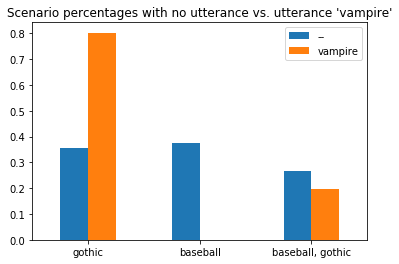

In [11]:
df_scenarios = wpplout.webppl_groupformat_scenariopd(samples)
df_scenarios_vampire = wpplout.webppl_groupformat_scenariopd(vampire_samples)

# combine the two data frames for visualization
viz_df = df_scenarios.merge(df_scenarios_vampire, 
                             left_on = "scenarios", 
                             right_on = "scenarios", 
                             how = "left").fillna(0)

viz_df = viz_df.set_index("scenarios")
viz_df.columns = ["--", "vampire"]

# and plot
%matplotlib inline

ax = viz_df.plot.bar(title = "Scenario percentages with no utterance vs. utterance 'vampire'",
               rot = 0)
ax.set_xlabel("");


### Utterance "bat" versus "vampire, bat"

Reminder: In version 1, we can only utter unconnected lists of words. The question with the utterance "vampire, bat" is: How often is this understood as bat-animal, how often as bat-stick? We compare this to an utterance that is simply "bat", where we expect to get each reading of "bat" equally often. 

What this example will hopefully show is that high-level constraints can disambiguate words, like in "the player ran to the ball" versus "the violinist ran to the ball". 

All parameters as with the utterance "vampire".

Making samples for the utterance "bat":

``webppl version1_utterance.wppl > batout.txt``

Making sample for the utterance "vampire, bat":

``webppl version1_utterance.wppl > vampirebatout.txt``



In [12]:
# utterance "bat"
bat_samples = wpplout.parse_webppl_groupformat("batout.txt")
wpplout.webppl_probbats(bat_samples)

,Concept,Empirical probability
0,Bat-stick,0.756
1,Bat-animal,0.753


In [13]:
# utterance "vampire, bat"
vampirebat_samples = wpplout.parse_webppl_groupformat("vampirebatout.txt")
wpplout.webppl_probbats(vampirebat_samples)

,Concept,Empirical probability
0,Bat-stick,0.3145
1,Bat-animal,0.9480


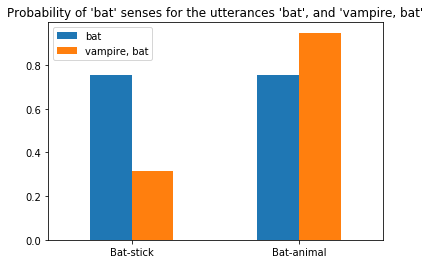

In [14]:
# and visualizing the whole thing
df_bat = wpplout.webppl_probbats(bat_samples)
df_vampirebat = wpplout.webppl_probbats(vampirebat_samples)

# combine the two data frames for visualization
viz_df = df_bat.merge(df_vampirebat, 
                             left_on = "Concept", 
                             right_on = "Concept", 
                             how = "left").fillna(0)

viz_df = viz_df.set_index("Concept")
viz_df.columns = ["bat", "vampire, bat"]


# and plot
%matplotlib inline

ax = viz_df.plot.bar(title = "Probability of 'bat' senses for the utterances 'bat', and 'vampire, bat'",
               rot = 0)
ax.set_xlabel("");

So when the utterance is "vampire, bat", the "animal" reading is preferred, but this is only a soft preference, no hard constraint. (If alpha were smaller, we would get a higher count of animals.)

# Version 2: With selectional constraints

Version 2 of the generative model has semantic roles with selectional constraints. 

## Hard constraints

We can model hard selectional constraints, for example in order to say that ideas cannot sleep (using Chomsky's famous sentence). Here is the result of 2000 samples of situation descriptions each containing a Bat, an Idea, and a Sleeping event. The Sleeping event is set to have Agent as a mandatory role, and insists on the agent being animate. 

In 100% of the samples, we get that the Agent of the Sleeping event is the bat, not the idea. 

Parameters:
* 2000 samples
* scenario: gothic
* concepts: Sleep, Bat-animal, Idea
* features: bat, sleep, idea, animate
* truth probabilities for Bat: animate 1.0, bat 1.0, idea 0.0
* truth probabilities for Idea: animate 0.0, bat 0.0, idea 1.0
* realization probability of Agent for Sleep: 1.0
* selectional probabilities: probability of generating a (single-feature) selectional vector for Sleep/Agent: animate: 1.0 

Call:

```webppl role_sleep.wppl > rolesleepout.txt```

Parsing the output:

In [15]:
wpplout.parse_webppl_groupformat_eventspd("rolesleepout.txt")

,condition,probability
0,event:Sleep role:Agent filler:Bat,1.0


## Soft constraints

Next we demonstrate soft selectional preferences: The verb *eat* prefers its direct object to be edible, though it can also be used on non-edible objects sometimes. We have a baseball scenario containing a bat-stick, an apple, and an eating event. (We omit to specify the agent here, but presumably that would be a player.)

Parameters:
* 2000 samples
* scenario: baseball
* concepts: Apple, Bat-stick, Eat
* features: apple, bat, eat, edible, object
* truth probabilities for Apple: apple 1.0, bat 0.0, eat 0.0, edible 0.98, object 1.0
* truth probabilities for Bat-stick: apple 0.0, bat 1.0, eat 0.0, edible 0.01, object 1.0
* realization probability of Patient for Eat: 1.0 (mandatory)
* selectional probabilities: probability of generating a (single-feature) selectional vector for Eat/Patient: "edible" 1.0, "object" 0.05. (sometimes non-edible objects get eaten.)

Call:

```webppl role_apple_bat.wppl > roleapplebatout.txt```

Results:

In [16]:
wpplout.parse_webppl_groupformat_eventspd("roleapplebatout.txt")

,condition,probability
0,event:Eat role:Patient filler:Apple,0.9655
1,event:Eat role:Patient filler:Bat-stick,0.0345


# Version 3: concept combination

Version 3 of the generative model has head-modifier combination.

## Fanged bat-animal

The first thing we try is to compare features sampled for "bat" to features sampled for "fanged bat".
In this experiment, we hard-code in the program that we sample from a concept combination of "fanged" with "bat". 

For this experiment, parameters were set as follows:

* no Dirichlet, as we're currently doing a single concept only, so no scenarios
* 2000 samples 
* truth probabilities for "bat": from Quantified McRae. 
* truth probabilities for "fanged": 1.0 for "fanged", 0.999 for "animal", 0.01 for everything else
* salience probabilities for "bat": relative mention frequencies from McRae.
* salience probabilities for "fanged" :1.0 for "fanged", 0.0 for everything else
* voting importance probabilities: set automatically based on truth probabilities. Whenever truth probability was within threshold 0.001 of either 1.0 or 0.0, voting importance was set to 1.0. Otherwise, voting importance was set to be equal to salience probability. 

We cut down the number of features to make it possible to show all the numbers in a graph. These are the ones we used:

    "bat", "has_wings", "nocturnal", "furry", "animal", "screeches", "has_fangs", "associated_with_vampires"

Output with "bat" on its own:

``webppl bat.wppl > ccomb_batout.txt``

Output for the concept combination "fanged bat":

``webppl fangedbat.wppl > ccomb_fangedbatout.txt``


In [17]:
# Empirical feature probabilities 
# in the samples of "bat" on its own
ccbat_samples = wpplout.parse_webppl_groupformat("ccomb_batout.txt")
wpplout.webppl_groupformat_featureprob(ccbat_samples)

,feature,prob
0,bat,1.0000
1,has_wings,1.0000
2,nocturnal,0.9840
3,furry,0.9855
4,animal,1.0000
5,screeches,0.6645
6,has_fangs,0.7765
7,associated_with_vampires,0.3525


In [18]:
# Empirical feature probabilities 
# in the samples of "fanged bat"
ccfangedbat_samples = wpplout.parse_webppl_groupformat("ccomb_fangedbatout.txt")
wpplout.webppl_groupformat_featureprob(ccfangedbat_samples)


,feature,prob
0,bat,1.000
1,has_wings,1.000
2,nocturnal,0.979
3,furry,0.986
4,animal,1.000
5,screeches,0.654
6,has_fangs,1.000
7,associated_with_vampires,0.354


And graphically:

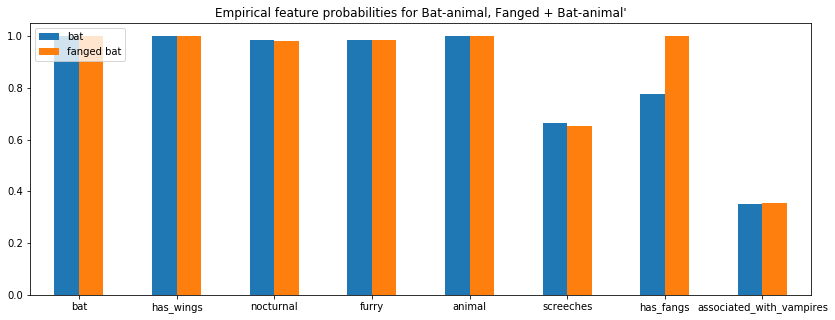

In [19]:
df_ccbat = wpplout.webppl_groupformat_featureprob(ccbat_samples)
df_ccfanged = wpplout.webppl_groupformat_featureprob(ccfangedbat_samples)


# combine the two data frames for visualization
viz_df = df_ccbat.merge(df_ccfanged, 
                             left_on = "feature", 
                             right_on = "feature", 
                             how = "left").fillna(0)

viz_df = viz_df.set_index("feature")
viz_df.columns = ["bat", "fanged bat"]


# and plot
%matplotlib inline

ax = viz_df.plot.bar(title = "Empirical feature probabilities for Bat-animal, Fanged + Bat-animal'", 
                     rot = 0, figsize = (14, 5))
ax.legend(loc='upper left')
ax.set_xlabel("");

## Pet fish

We do the exact same thing with Hampton's "pet fish" example.

Parameters:

* single scenario, "Animals"
* concepts: Pet, Fish
* 2000 samples
* truth probabilities for Pet:
"pet" 1.0, "fish" 0.1, "lives_in_home" 1.0, "eaten" 0.001, "gills_rather_than_lungs" 0.1, "legs_rather_than_fins" 0.9
* truth probabilities for Fish:
"pet" 0.1, "fish" 1.0, "lives_in_home" 0.1, "eaten" 0.9, "gills" 1.0, "legs" 0.0
* salience probabilities for Pet:
"pet" 1.0, "fish" 0.0, "lives_in_home" 0.8, "eaten" 0.2, "gills" 0.1, "legs" 0.1
* salience probabilities for Fish:
"pet" 0.01, "fish" 1.0, "lives_in_home" 0.1, "eaten" 0.5, "gills" 0.5, "legs" 0.5
* importance probability computed automatically as before, threshold 0.001

We are using the same script for all three outputs, just commenting away different options for which concepts are used.

Sampling pets:

``webppl concept_combination_petfish.wppl > ccomb_pet.txt``

Sampling fish:

``webppl concept_combination_petfish.wppl > ccomb_fish.txt``

Sampling pet fish:

``webppl concept_combination_petfish.wppl > ccomb_petfish.txt``

Here is a visualization:

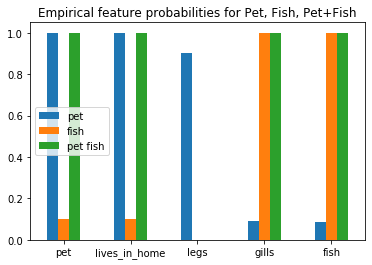

In [20]:
ccpet_samples = wpplout.parse_webppl_groupformat("ccomb_pet.txt")
ccfish_samples = wpplout.parse_webppl_groupformat("ccomb_fish.txt")
ccpetfish_samples = wpplout.parse_webppl_groupformat("ccomb_petfish.txt")

df_ccpet = wpplout.webppl_groupformat_featureprob(ccpet_samples)
df_ccfish = wpplout.webppl_groupformat_featureprob(ccfish_samples)
df_ccpetfish = wpplout.webppl_groupformat_featureprob(ccpetfish_samples)


# combine the data frames for visualization
viz_df = df_ccpet.merge(df_ccfish, 
                             left_on = "feature", 
                             right_on = "feature", 
                             how = "left").fillna(0)
viz_df = viz_df.merge(df_ccpetfish, 
                             left_on = "feature", 
                             right_on = "feature", 
                             how = "left").fillna(0)
viz_df = viz_df.set_index("feature")
viz_df.columns = ["pet", "fish", "pet fish"]


# and plot
ax = viz_df.plot.bar(title = "Empirical feature probabilities for Pet, Fish, Pet+Fish", 
                     rot = 0)
ax.legend(loc='center left')
ax.set_xlabel("");

# Final experiment: The astronomer married the star

parameters:
* 2000 samples
* We vary the concentration parameter: **alpha = 0.5, 0.1, 0.05**
* scenarios: Stargazing, Theatre
* concepts: Astronomer, Star-sun, Star-person, Marry
* features: "astronomer", "marry", "star", "person", "object"
* truth probabilities for Astronomer: astronomer 1.0, marry 0.0, star 0.0, person 1.0, object 1.0
* truth probabilities for Star-sun: astronomer 0.0, marry 0.0, star 1.0, person 0.0, object 1.0
* truth probabilities for Star-person: astronomer 0.0, marry 0.0, star 1.0, person 1.0, object 1.0
* role realization probabilities for Marry: Agent 1.0, Patient 1.0 (both mandatory, for simplicity)
* selectional probabilities for Marry/Agent:  person 1.0, object 0.1
* selectional probabilities for Marry/Patient: person 1.0, object 0.1
* Utterance: ```exists x, y, e. astronomer(x) & marry(e) & star(y) &  Agent(e, x) &  Patient(e, y)```

Data generation:

alpha = 0.5: 
```webppl astronomer_married_star.wppl > astronomer_out_05.txt```
alpha = 0.1:
```webppl astronomer_married_star.wppl > astronomer_out_01.txt```

alpha = 0.05:
```webppl astronomer_married_star.wppl > astronomer_out_005.txt```

Result:

In [21]:
def analyze_stars(samples):
    prob_star = { }
    for sample in samples:
        prob, groups, roles = sample
        for group in groups.values():
            features = group[3]
            if "star" in features:
                conc = "/".join(sorted(group[2]))
                prob_star[ conc] = prob_star.get(conc, 0) + prob
    df = pd.DataFrame(prob_star.items())
    df.columns = ["concept", "prob"]
    return df
      
samples_a05 = analyze_stars(wpplout.parse_webppl_groupformat("astronomer_out_05.txt"))
samples_a01 = analyze_stars(wpplout.parse_webppl_groupformat("astronomer_out_01.txt"))
samples_a005 = analyze_stars(wpplout.parse_webppl_groupformat("astronomer_out_005.txt"))

Percentages for alpha = 0.5:

In [22]:
samples_a05

,concept,prob
0,Star-person,0.856
1,Star-sun,0.144


Percentages for alpha = 0.1:

In [23]:
samples_a01

,concept,prob
0,Star-person,0.617
1,Star-sun,0.383


Percentages for alpha = 0.05:

In [24]:
samples_a005

,concept,prob
0,Star-sun,0.526
1,Star-person,0.474


Graphically:

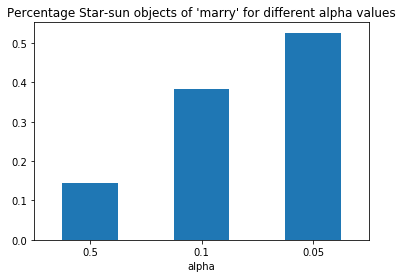

In [25]:
viz_df = samples_a05
viz_df = viz_df.merge(samples_a01, on = "concept")
viz_df = viz_df.merge(samples_a005, on = "concept")
viz_df = viz_df.set_index("concept")
viz_df.columns = ["0.5", "0.1", "0.05"]

ax = viz_df.loc["Star-sun"].plot.bar(rot = 0,
                                title= "Percentage Star-sun objects of 'marry' for different alpha values")
ax.set_xlabel("alpha");

# The vampire eats...

Parameters:

* utterance: exists x, e.vampire(x) & eat(e) & Agent(e, x)
* single scenario, Gothic
* concepts: "Vampire", "Bat-animal", "Blood_orange", "Castle", "Eat"
* features: "vampire", "bat", "blood_orange", "castle", "eat",
		    "animal_ish", "object", "edible", "building"
* maximal number of referents: 6
* realization probabilities for Eat: Agent: 1.0, Patient 0.8, Location 0.4
* selectional probabilities: 
  * Eat/Agent: animal_ish 1.0, object 0.1
  * Eat/Patient: edible 1.0, object 0.1
  * Eat/Location: building 1.0, object 0.05
  
Call: 
``webppl vampire_eats.wppl > vampire_eats_out.txt``


In [26]:
ve_samples = wpplout.parse_webppl_groupformat("vampire_eats_out.txt")
pd.set_option('display.max_colwidth', 1000)

wpplout.webppl_groupformat_drspd(ve_samples).sort_values("probability", 
                                                        ascending=False).head(20)


,drs,probability
0,"x0:Blood_orange, x1:Eat, x2:Vampire Agent(x1, x2), Patient(x1, x0)",0.0675
8,"x0:Bat-animal, x1:Blood_orange, x2:Eat, x3:Vampire Agent(x2, x3), Patient(x2, x1)",0.0280
4,"x0:Blood_orange, x1:Eat, x2:Vampire, x3:Vampire Agent(x1, x2), Patient(x1, x0)",0.0240
6,"x0:Blood_orange, x1:Castle, x2:Eat, x3:Vampire Agent(x2, x3), Patient(x2, x0)",0.0235
7,"x0:Blood_orange, x1:Castle, x2:Eat, x3:Vampire Agent(x2, x3), Patient(x2, x0), Location(x2, x1)",0.0205
2,"x0:Blood_orange, x1:Eat, x2:Vampire Agent(x1, x2)",0.0200
13,"x0:Bat-animal, x1:Blood_orange, x2:Eat, x3:Vampire, x4:Vampire Agent(x2, x3), Patient(x2, x1)",0.0185
1,"x0:Eat, x1:Vampire, x2:Vampire Agent(x0, x1)",0.0185
17,"x0:Blood_orange, x1:Castle, x2:Eat, x3:Vampire, x4:Vampire Agent(x2, x3), Patient(x2, x0)",0.0180
5,"x0:Bat-animal, x1:Eat, x2:Vampire Agent(x1, x2)",0.0150


In [27]:
# details: 
# how often do we have a patient, how often do we have a location?
# how often does the vampire eat a blood orange, a bat, another vampire

def vampire_eats_showdetails(ve_samples):
    prob_patient = 0
    prob_location = 0
    prob_agentonly = 0
    prob_patient_is = { }
    prob_location_is = { }

    for sample in ve_samples:
        prob, groups, roles = sample
        if any(role[0] == "Patient" for role in roles):
            prob_patient += prob
        if any(role[0] == "Location" for role in roles):
            prob_location += prob
        if len(roles) == 1:
            prob_agentonly += prob
    
        patients = set("/".join(groups[role[2]][2]) for role in roles if role[0] == "Patient")
        for patient in patients:
            prob_patient_is[patient] = prob_patient_is.get(patient, 0) + prob
        locations = set("/".join(groups[role[2]][2]) for role in roles if role[0] == "Location")
        for location in locations:
            prob_location_is[location] = prob_location_is.get(location, 0) + prob
    
     
                

    print("Prob. of having a patient:", round(prob_patient, 3))
    print("Prob. of having a location:", round(prob_location, 3))
    print("Prob. of only having an agent:", round(prob_agentonly, 3))
    print("Summed prob. of situation descriptions with particular patients:")
    for patient, prob in prob_patient_is.items():
        print("\t", patient, ":", round(prob, 3))
    print("Summed prob. of situation descriptions with particular locations:")
    for location, prob in prob_location_is.items():
        print("\t", location, ":", round(prob, 3))
        
vampire_eats_showdetails(ve_samples)

Prob. of having a patient: 0.706
Prob. of having a location: 0.252
Prob. of only having an agent: 0.202
Summed prob. of situation descriptions with particular patients:
	 Blood_orange : 0.641
	 Bat-animal : 0.033
	 Vampire : 0.024
	 Castle : 0.022
Summed prob. of situation descriptions with particular locations:
	 Castle : 0.241
	 Vampire : 0.005
	 Blood_orange : 0.004
	 Bat-animal : 0.004


The probability for realizing a patient is 0.8, but only 71% of situation descriptions have patients. Why is this? This is because finding a role filler can fail -- there may be no entity in the situation description that can fill the role. 